CONTENTS:
- [Imports](#imports)
- [Authenticate GitHub Client](#authenticate-github-client)
- [Pre-feth all the data from last 6 months in cache](#pre-feth-all-the-data-from-last-6-months-in-cache)
- [Intern Evaluation](#intern-evaluation)
  - [Compare Intern Total performance across all repos since last 3 months](#compare-intern-total-performance-across-all-repos-since-last-3-months)
  - [Performance Evaluation - Intern - Last 3 Months (based on Issues and PRs closed)](#performance-evaluation---intern---last-3-months-(based-on-issues-and-prs-closed))
- [Full Time Evaluation](#full-time-evaluation)
  - [Compare Full time contributors total performance across all repos since last 3 months](#compare-full-time-contributors-total-performance-across-all-repos-since-last-3-months)
  - [Performance Evaluation - FullTime - Last 3 Months (based on Issues and PRs closed)](#performance-evaluation---fulltime---last-3-months-(based-on-issues-and-prs-closed))

<a name='imports'></a>
# Imports

In [1]:
!sudo /bin/bash -c "(source /venv/bin/activate; pip install --quiet jupyterlab-vim PyGithub)"
!jupyter labextension enable

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import datetime
import logging
import os

import github_utils

In [4]:
# Enable logging.
logging.basicConfig(level=logging.INFO)
_LOG = logging.getLogger(__name__)

<a name='authenticate-github-client'></a>
# Authenticate GitHub Client

In [6]:
os.environ["GITHUB_ACCESS_TOKEN"] = "*"

In [7]:
access_token = os.getenv("GITHUB_ACCESS_TOKEN")
if not access_token:
    _LOG.error("GITHUB_ACCESS_TOKEN not set. Exiting.")
    raise ValueError("Set GITHUB_ACCESS_TOKEN environment variable")
client = github_utils.GitHubAPI(access_token=access_token).get_client()

In [8]:
users = github_utils.get_github_contributors(
    client, repo_names=["causify-ai/cmamp"]
)
print(users)

{'causify-ai/cmamp': ['gpsaggese', 'gitpaulsmith', 'rheenina', 'DanilYachmenev', 'PomazkinG', 'jsmerix', 'tamriq', 'gad26032', 'plyq', 'mongolianjesus', 'dremdem', 'Shayawnn', 'sonaalKant', 'Sameep2808', 'sonniki', 'heanhsok', 'samarth9008', 'Vedanshu7', 'mindfreakthemon', 'max-rsrch', 'pavolrabatin', 'Shaunak01', 'amrawadk', 'Jd8111997', 'tkpratardan', 'alinakhay', 'Tsallagov', 'neha2801-create', 'katerynak', 'aish-nidhi', 'jayati1397', 'elforeee', 'k0nsta', 'why2000', 'lizvladi', 'Vitaly-Protasov', 'cma0416', 'OlgaVakhonina', 'tuimazy2008', 'enotdima', 'zet694', 'daberezina', 'jserebr', 'pavel-particle', 'k911mipt', 'LibertasSpZ', 'RichardProchadzka', 'sumedha-24', 'andsilver', 'vvandriichuk']}


In [9]:
active_users_total = [
    "gpsaggese",
    "tkpratardan",
    "Shaunak01",
    "sonniki",
    "heanhsok",
    "Shayawnn",
    "rheenina",
    "PomazkinG",
    "gitpaulsmith",
    "samarth9008",
    "Vedanshu7",
    "dremdem",
    "cma0416",
    "aangelo9",
    "indrayudd",
    "aver81",
    "madhurlak0810",
    "PranavShashidhara",
    "srinivassaitangudu",
    "sandeepthalapanane",
]

<a name='pre-feth-all-the-data-from-last-6-months-in-cache'></a>
# Pre-feth all the data from last 6 months in cache

In [14]:
# Use a long window for caching and a narrow slice for final analysis.
period_full = github_utils.utc_period("2025-01-01", "2025-07-14")

In [15]:
repos = [
    "helpers",
    "tutorials",
    "cmamp",
    "kaizenflow",
    "orange",
    "sports_analytics",
]
org = "causify-ai"

In [17]:
github_utils.prefetch_periodic_user_repo_data(
    client, org, repos, active_users_total, period_full
)

helpers/gpsaggese: 65 commits, 59 PRs, 65 LOC entries, 17 issues assigned, 5 closed
helpers/tkpratardan: 7 commits, 8 PRs, 7 LOC entries, 4 issues assigned, 1 closed
helpers/Shaunak01: 33 commits, 37 PRs, 33 LOC entries, 48 issues assigned, 39 closed
helpers/sonniki: 52 commits, 53 PRs, 52 LOC entries, 44 issues assigned, 38 closed
helpers/heanhsok: 87 commits, 96 PRs, 87 LOC entries, 49 issues assigned, 36 closed
helpers/Shayawnn: 0 commits, 0 PRs, 0 LOC entries, 3 issues assigned, 0 closed
helpers/rheenina: 0 commits, 1 PRs, 0 LOC entries, 0 issues assigned, 0 closed
helpers/PomazkinG: 0 commits, 3 PRs, 0 LOC entries, 0 issues assigned, 0 closed
helpers/gitpaulsmith: 1 commits, 1 PRs, 1 LOC entries, 0 issues assigned, 0 closed
helpers/samarth9008: 2 commits, 3 PRs, 2 LOC entries, 4 issues assigned, 3 closed
helpers/Vedanshu7: 1 commits, 1 PRs, 1 LOC entries, 2 issues assigned, 2 closed
helpers/dremdem: 23 commits, 26 PRs, 23 LOC entries, 15 issues assigned, 14 closed
helpers/cma0416:

Prefetching user-repo data:  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 89/120 [00:00<00:00, 284.82it/s]

cmamp/indrayudd: 0 commits, 0 PRs, 0 LOC entries, 0 issues assigned, 0 closed
cmamp/aver81: 0 commits, 0 PRs, 0 LOC entries, 0 issues assigned, 0 closed
cmamp/madhurlak0810: 0 commits, 0 PRs, 0 LOC entries, 0 issues assigned, 0 closed
cmamp/PranavShashidhara: 0 commits, 0 PRs, 0 LOC entries, 0 issues assigned, 0 closed
cmamp/srinivassaitangudu: 0 commits, 0 PRs, 0 LOC entries, 0 issues assigned, 0 closed
cmamp/sandeepthalapanane: 0 commits, 0 PRs, 0 LOC entries, 0 issues assigned, 0 closed
kaizenflow/gpsaggese: 0 commits, 0 PRs, 0 LOC entries, 1 issues assigned, 1 closed
kaizenflow/tkpratardan: 0 commits, 0 PRs, 0 LOC entries, 0 issues assigned, 0 closed
kaizenflow/Shaunak01: 1 commits, 1 PRs, 1 LOC entries, 1 issues assigned, 1 closed
kaizenflow/sonniki: 0 commits, 0 PRs, 0 LOC entries, 0 issues assigned, 0 closed
kaizenflow/heanhsok: 1 commits, 1 PRs, 1 LOC entries, 0 issues assigned, 0 closed
kaizenflow/Shayawnn: 0 commits, 0 PRs, 0 LOC entries, 0 issues assigned, 0 closed
kaizenflo

Prefetching user-repo data: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 120/120 [00:00<00:00, 292.47it/s]
INFO:github_utils:Prefetched 120 user-repo combos in 0.41 seconds for period 2025-01-01 00:00:00+00:00 to 2025-07-14 00:00:00+00:00.


sports_analytics/sandeepthalapanane: 0 commits, 0 PRs, 0 LOC entries, 0 issues assigned, 0 closed


In [18]:
full_time_users = [
    "gpsaggese",
    "tkpratardan",
    "Shaunak01",
    "sonniki",
    "heanhsok",
    "Shayawnn",
    "rheenina",
    "PomazkinG",
    "gitpaulsmith",
    "samarth9008",
    "Vedanshu7",
    "dremdem",
    "cma0416",
]

In [19]:
intern_users = [
    "aangelo9",
    "indrayudd",
    "aver81",
    "madhurlak0810",
    "PranavShashidhara",
    "srinivassaitangudu",
    "sandeepthalapanane",
]

<a name='intern-evaluation'></a>
# Intern Evaluation

In [20]:
combined_df_intern = github_utils.collect_all_metrics(
    client, org, repos, intern_users, period_full
)

<a name='compare-intern-total-performance-across-all-repos-since-last-3-months'></a>
## Compare Intern Total performance across all repos since last 3 months

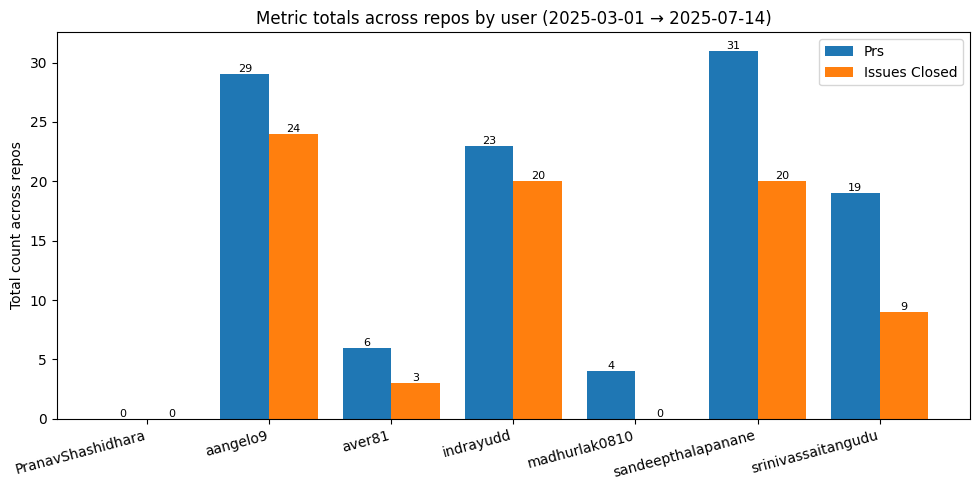

In [31]:
github_utils.plot_multi_metrics_totals_by_user(
    combined=combined_df_intern,
    metrics=["prs", "issues_closed"],
    users=intern_users,
    repos=repos,
    start=datetime.datetime(2025, 3, 1),
    end=datetime.datetime(2025, 7, 14),
)

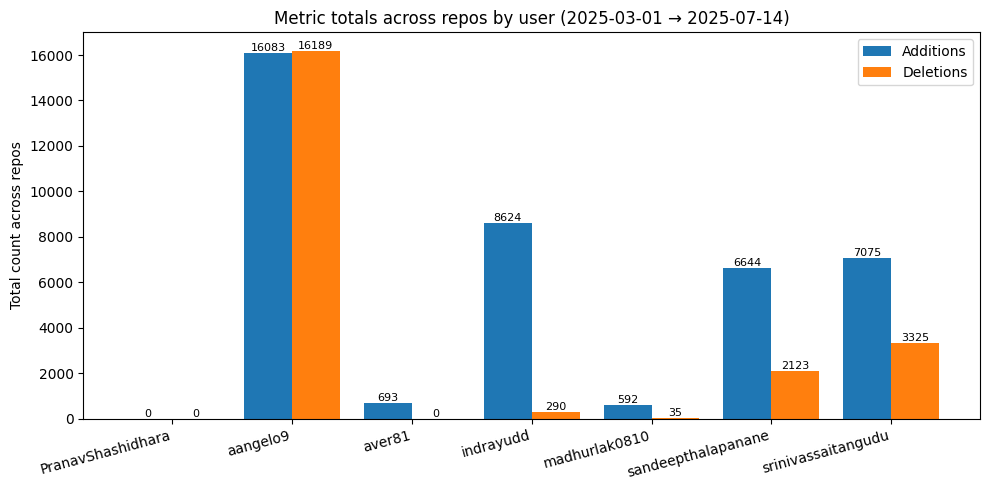

In [32]:
github_utils.plot_multi_metrics_totals_by_user(
    combined=combined_df_intern,
    metrics=["additions", "deletions"],
    users=intern_users,
    repos=repos,
    start=datetime.datetime(2025, 3, 1),
    end=datetime.datetime(2025, 7, 14),
)

<a name='performance-evaluation---intern---last-3-months-(based-on-issues-and-prs-closed)'></a>
<a name='performance-evaluation---intern---last-3-months-(based-on-issues-and-prs-closed-and-)'></a>
## Performance Evaluation - Intern - Last 3 Months (based on Issues and PRs closed)

,prs_pctile,issues_closed_pctile
user,,
PranavShashidhara,0.14,0.21
aangelo9,0.86,1.00
aver81,0.43,0.43
indrayudd,0.71,0.79
madhurlak0810,0.29,0.21
sandeepthalapanane,1.00,0.79
srinivassaitangudu,0.57,0.57


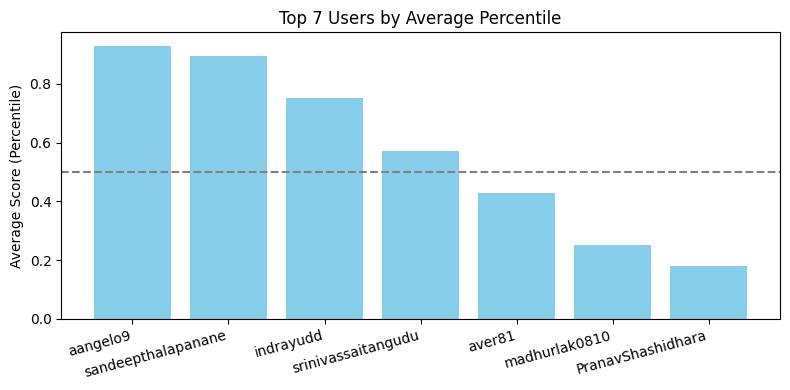

In [ ]:
metrics = ["prs", "issues_closed"]
summary_users = github_utils.summarize_users_across_repos(
    combined_df_intern, users=intern_users, repos=repos
)
stats = github_utils.compute_percentile_ranks(summary_users, metrics)
github_utils.visualize_user_metric_comparison(stats, score_type="percentile")

<a name='full-time-evaluation'></a>
# Full Time Evaluation

In [35]:
combined_df_fulltime = github_utils.collect_all_metrics(
    client, org, repos, full_time_users, period_full
)

<a name='compare-full-time-contributors-total-performance-across-all-repos-since-last-3-months'></a>
## Compare Full time contributors total performance across all repos since last 3 months

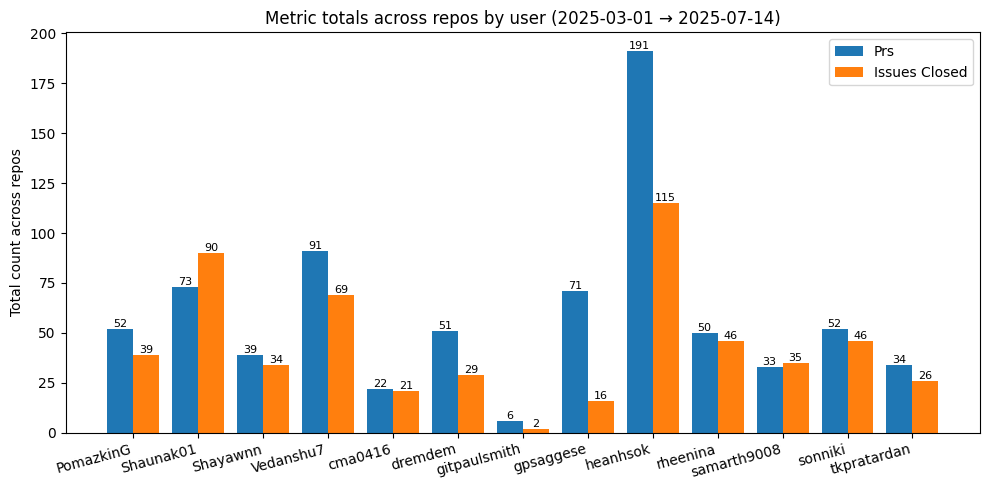

In [37]:
github_utils.plot_multi_metrics_totals_by_user(
    combined=combined_df_fulltime,
    metrics=["prs", "issues_closed"],
    users=full_time_users,
    repos=repos,
    start=datetime.datetime(2025, 3, 1),
    end=datetime.datetime(2025, 7, 14),
)

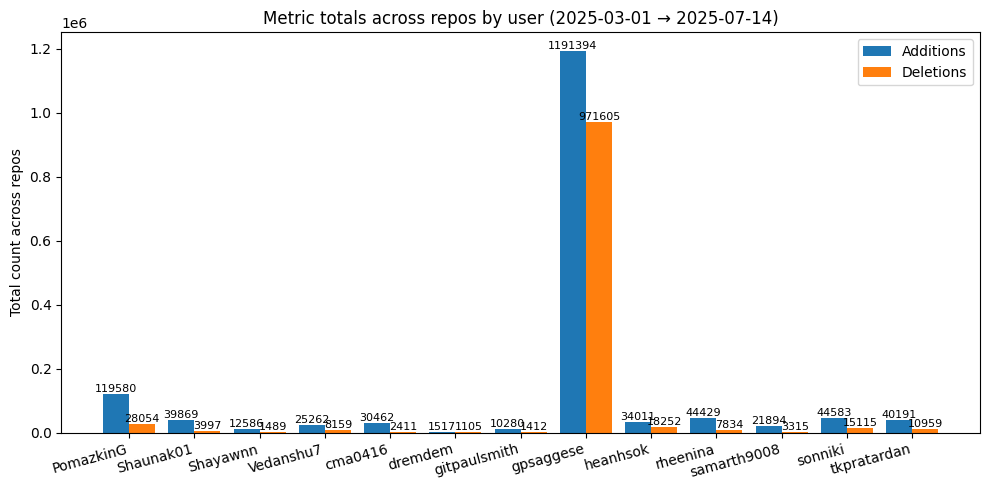

In [38]:
github_utils.plot_multi_metrics_totals_by_user(
    combined=combined_df_fulltime,
    metrics=["additions", "deletions"],
    users=full_time_users,
    repos=repos,
    start=datetime.datetime(2025, 3, 1),
    end=datetime.datetime(2025, 7, 14),
)

<a name='performance-evaluation---fulltime---last-3-months-(based-on-issues-and-prs-closed)'></a>
<a name='performance-evaluation---fulltime---last-3-months-(based-on-issues-and-prs-closed-and-)'></a>
## Performance Evaluation - FullTime - Last 3 Months (based on Issues and PRs closed)

,prs_pctile,issues_closed_pctile
user,,
PomazkinG,0.46,0.62
Shaunak01,0.77,0.92
Shayawnn,0.38,0.50
Vedanshu7,0.85,0.85
cma0416,0.15,0.23
dremdem,0.54,0.38
gitpaulsmith,0.08,0.08
gpsaggese,0.69,0.15
heanhsok,1.00,1.00


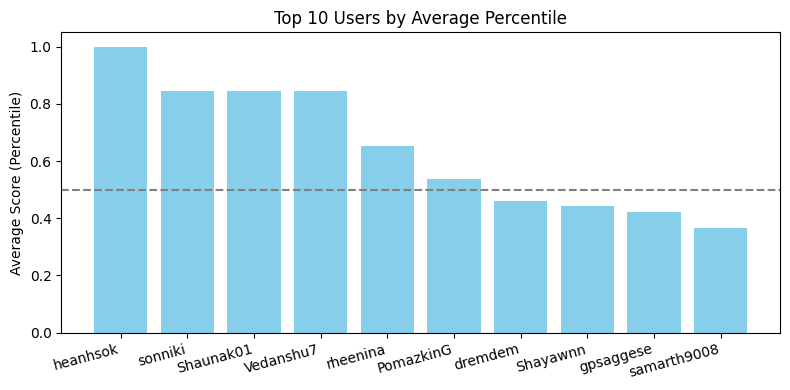

In [ ]:
metrics = ["prs", "issues_closed"]
summary_users_fulltime = github_utils.summarize_users_across_repos(
    combined_df_fulltime, users=full_time_users, repos=repos
)
stats = github_utils.compute_percentile_ranks(summary_users_fulltime, metrics)
github_utils.visualize_user_metric_comparison(
    stats, score_type="percentile", top_n=10
)